In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 

In [2]:
df = pd.read_csv('bank-full.csv', sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df['conversion'] = df['y'].apply(lambda x: 1 if x == 'yes'  else  0)

In [4]:
df['housing_dummy'] = df['housing'].apply(lambda x: 1 if x == 'yes'  else  0)

In [5]:
job_dum = pd.get_dummies(df['job'])    # 虛擬變數陷阱問題? 
job_dum = job_dum.drop(['unknown'],axis= 1)  

這裡不用 Drop_first = True 的原因為，unknow 弄掉比較好解釋

In [6]:
job_dum.columns = ['jobs_%s'% x for x in job_dum.columns]
job_dum

,jobs_admin.,jobs_blue-collar,jobs_entrepreneur,jobs_housemaid,jobs_management,jobs_retired,jobs_self-employed,jobs_services,jobs_student,jobs_technician,jobs_unemployed
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,0
45207,0,0,0,0,0,1,0,0,0,0,0
45208,0,0,0,0,0,1,0,0,0,0,0
45209,0,1,0,0,0,0,0,0,0,0,0


In [7]:
df  = pd.concat([df,job_dum] ,axis = 1)

In [8]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,jobs_blue-collar,jobs_entrepreneur,jobs_housemaid,jobs_management,jobs_retired,jobs_self-employed,jobs_services,jobs_student,jobs_technician,jobs_unemployed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,1,0,0,0,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,1,0,0,0,0,0,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,...,0,0,0,0,0,0,0,0,1,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,...,0,0,0,0,1,0,0,0,0,0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,...,0,0,0,0,1,0,0,0,0,0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,...,1,0,0,0,0,0,0,0,0,0


In [9]:
list(job_dum.columns)

['jobs_admin.',
 'jobs_blue-collar',
 'jobs_entrepreneur',
 'jobs_housemaid',
 'jobs_management',
 'jobs_retired',
 'jobs_self-employed',
 'jobs_services',
 'jobs_student',
 'jobs_technician',
 'jobs_unemployed']

In [10]:
X_name = [
    'age',
    'balance',
    'campaign',
    'previous',
    'housing_dummy',] #+ list(job_dum.columns)

In [11]:
X =  df[X_name]
X.head()

,age,balance,campaign,previous,housing_dummy
0,58,2143,1,0,1
1,44,29,1,0,1
2,33,2,1,0,1
3,47,1506,1,0,1
4,33,1,1,0,0


In [12]:
y = df['conversion']

In [13]:
from sklearn.model_selection import train_test_split

試驗組切割

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30 , stratify=y)
print('train shape:', X_train.shape)
print('test shape:', X_test.shape)

train shape: (31647, 5)
test shape: (13564, 5)


In [15]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, criterion = 'gini')

clf.fit(X_train, y_train)   # 使用Train 資料訓練模型

RandomForestClassifier()

In [16]:
predicted = clf.predict(X_train)

In [17]:
print('訓練預測準確度: ',clf.score(X_train,y_train)*100, "%")
print('測試集預測準確度: ',clf.score(X_test,y_test)*100 ,'%')

訓練預測準確度:  99.41858627990014 %
測試集預測準確度:  86.17664405780006 %


In [18]:
X

,age,balance,campaign,previous,housing_dummy
0,58,2143,1,0,1
1,44,29,1,0,1
2,33,2,1,0,1
3,47,1506,1,0,1
4,33,1,1,0,0
...,...,...,...,...,...
45206,51,825,3,0,0
45207,71,1729,2,0,0
45208,72,5715,5,3,0
45209,57,668,4,0,0


以下重要度特徵，表示balance 年度餘額 對該模型影響最大

In [19]:
print(clf.feature_importances_)  # 特徵重要程度

[0.22410905 0.6186524  0.0588251  0.07144501 0.02696845]


In [20]:
df_test=pd.DataFrame(X_test, columns= (X_name) )
df_test['conversion'] = y_test

In [21]:
import seaborn as sns

C:\Users\JamesLiu\anaconda3\envs\data1\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


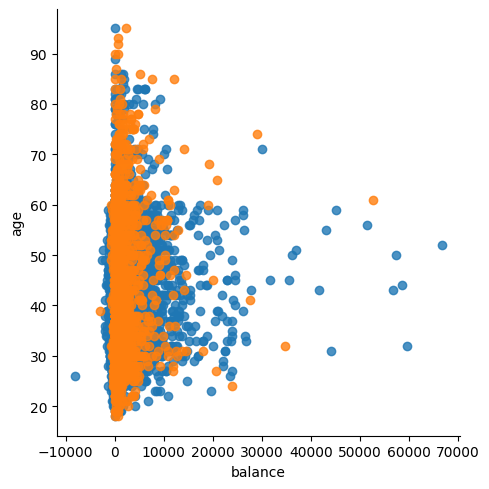

In [22]:
sns.lmplot(x="balance", y="age", data=df_test, hue="conversion", fit_reg=False, legend=False)
plt.show()

In [23]:
from sklearn.tree import export_graphviz
from sklearn import tree

Ramdom forest的決策樹看起來也不是很好，沒有直觀意義

[Text(0.5, 0.8333333333333334, 'x[0] <= 60.5\ngini = 0.205\nsamples = 20099\nvalue = [27986, 3661]'),
 Text(0.25, 0.5, 'x[3] <= 0.5\ngini = 0.192\nsamples = 19568\nvalue = [27469, 3307]'),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'x[3] <= 1.5\ngini = 0.482\nsamples = 531\nvalue = [517, 354]'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

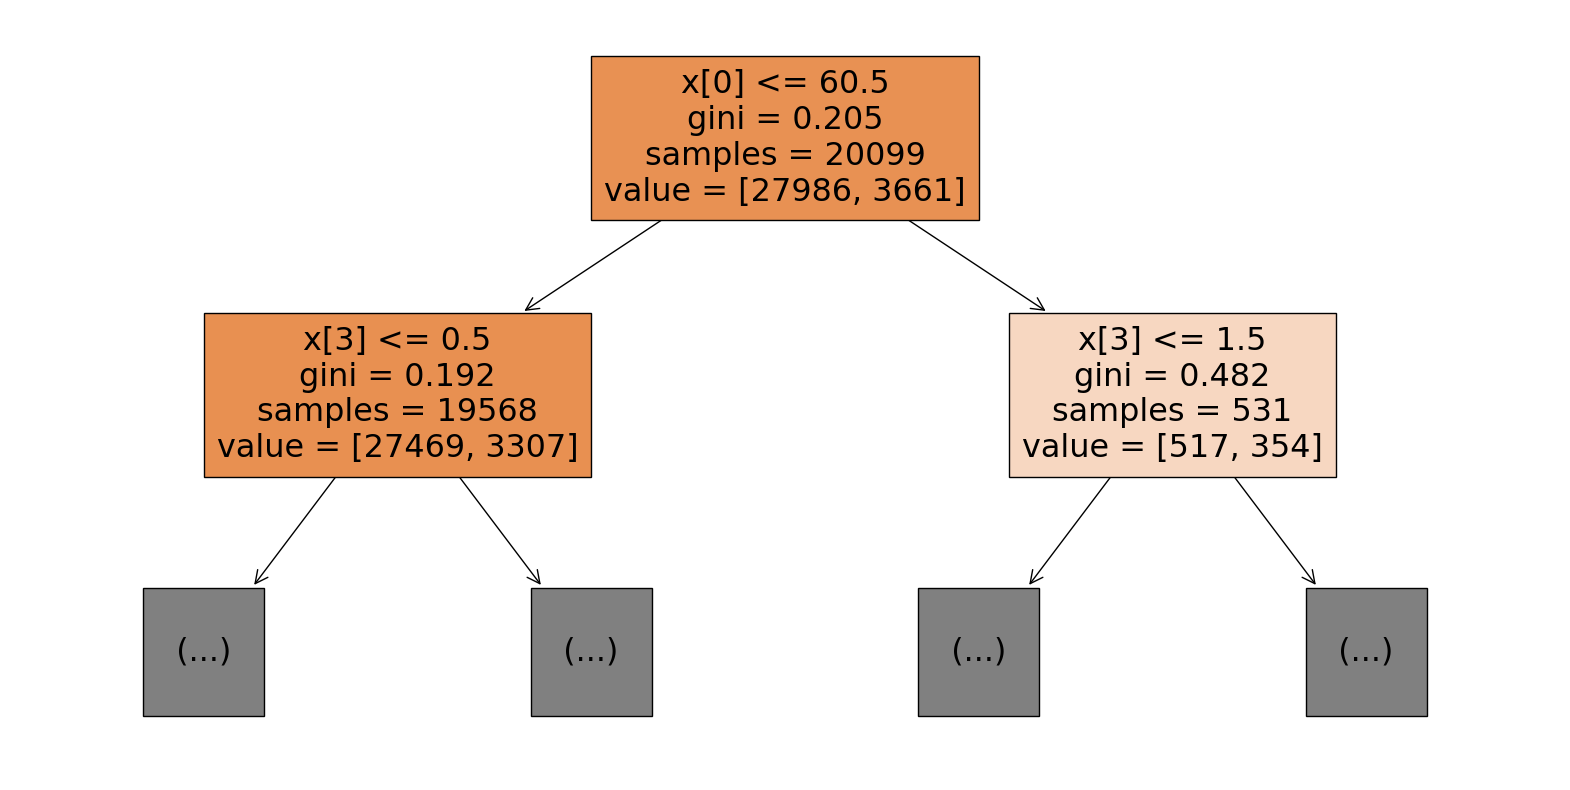

In [28]:
from sklearn import tree
featureName=[X_name]
className=['1','2']
fig, axes = plt.subplots(figsize = (20,10))
# 繪製決策
tree.plot_tree(clf.estimators_[0],
                   max_depth = 1 ,
                   filled = True
                   )